### Kod bi trebao raditi ako je RPi spojen sa senzorima na ovaj nacin.
Ne znam kako se točno spajaju ti senzori al koliko sam vidjela na netu ovako nekako.

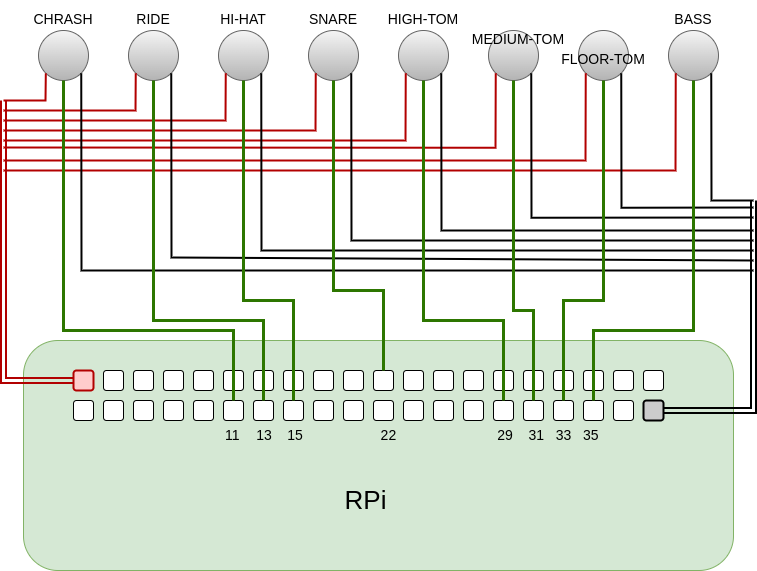

In [ ]:
import RPi.GPIO as GPIO # Import Raspberry Pi GPIO library
from playsound import playsound
import os

if __name__=='__main__':
    path = os.getcwd()+'/sounds/'
    
    GPIO.setwarnings(False) # Ignore warning for now
    GPIO.setmode(GPIO.BOARD) # Use physical pin numbering
    
    drum_dict = {      # Ovdje idu brojevi od pinova na koje su prikljuceni senzori
        'CHRASH':11,
        'RIDE':13,
        'HI-HAT':15,
        'SNARE':22,
        'HIGH-TOM':29,
        'MEDIUM-TOM':31,
        'FLOOR-TOM':33,
        'BASS':35
    }
    GPIO.setup(list(drum_dict.values()), GPIO.IN)
    
    # Nisam stavila elif jer ce ovako mozda moci svirati dva tona u isto vrijeme kad to sedimo iako cisto sumljam
    
    while True:
        if(GPIO.input(drum_dict['CHRASH'])):
            playsound(path+'Cymbal.wav')
        if(GPIO.input(drum_dict['RIDE'])):
            playsound(path+'Clave1.wav')
        if(GPIO.input(drum_dict['HI-HAT'])):
            playsound(path+'CloseHH.wav')
        if(GPIO.input(drum_dict['SNARE'])):
            playsound(path+'SD.wav')
        if(GPIO.input(drum_dict['HIGH-TOM'])):
            playsound(path+'Tom-Hi.wav')
        if(GPIO.input(drum_dict['MEDIUM-TOM'])):
            playsound(path+'Tom-Mi.wav')
        if(GPIO.input(drum_dict['FLOOR-TOM'])):
            playsound(path+'Tom-Lo.wav')
        if(GPIO.input(drum_dict['BASS'])):
            playsound(path+'BD.wav')
        if(input()=='end'):
            break
            
        GPIO.cleanup()

### Simulacija koda s inputima iz konzole
Nez kako napraviti da se zvukovi sviraju paralelno. Pod 11 tj CHRASH sam ubacila dva zvuka i ovaj drugi se odsvira tek nakon sto prvi zavrsi.

In [13]:
from playsound import playsound
import os

path = os.getcwd()+'/sounds/'

drum_dict = {      # brojevi moraju bit string jer je input uvjek string
    'CHRASH':'11',
    'RIDE':'13',
    'HI-HAT':'15',
    'SNARE':'22',
    'HIGH-TOM':'29',
    'MEDIUM-TOM':'31',
    'FLOOR-TOM':'33',
    'BASS':'35'
}

while True:
    a = input()
    if(a == drum_dict['CHRASH']):
        playsound(path+'Cymbal.wav')
        playsound(path+'Clave1.wav')  # tek kad prvi zavrsi se drugi pusta
    if(a == drum_dict['RIDE']):
        playsound(path+'Clave1.wav')
    if(a == drum_dict['HI-HAT']):
        playsound(path+'CloseHH.wav')
    if(a == drum_dict['SNARE']):
        playsound(path+'SD.wav')
    if(a == drum_dict['HIGH-TOM']):
        playsound(path+'Tom-Hi.wav')
    if(a == drum_dict['MEDIUM-TOM']):
        playsound(path+'Tom-Mi.wav')
    if(a == drum_dict['FLOOR-TOM']):
        playsound(path+'Tom-Lo.wav')
    if(a == drum_dict['BASS']):
        playsound(path+'BD.wav')
    if(a == 'end'):
        break

15
22
29
31
33
35
end


### Simulacija koda s gumbovima
Opet se zukovi pustaju tek kad zavrsi prethodni. Ponekad malo zatrokirak kad pre brzo klikcem.

In [17]:
from tkinter import *
from tkinter import ttk
from playsound import playsound
import os

path = os.getcwd()+'/sounds/'
#Create an instance of Tkinter frame
win = Tk()
#Set the geometry of the Tkinter frame
win.geometry("250x250")

#Define a function to update the entry widget
def play(value):
    if(value == 11):
        playsound(path+'Cymbal.wav')
    elif(value == 13):
        playsound(path+'Clave1.wav')
    elif(value == 15):
        playsound(path+'CloseHH.wav')
    elif(value == 22):
        playsound(path+'SD.wav')
    elif(value == 29):
        playsound(path+'Tom-Hi.wav')
    elif(value == 31):
        playsound(path+'Tom-Mi.wav')
    elif(value == 33):
        playsound(path+'Tom-Lo.wav')
    elif(value == 35):
        playsound(path+'BD.wav')

#Create Multiple Buttons with different commands
button_dict={}
drum_dict = {
    'CHRASH':11,
    'RIDE':13,
    'HI-HAT':15,
    'SNARE':22,
    'HIGH-TOM':29,
    'MEDIUM-TOM':31,
    'FLOOR-TOM':33,
    'BASS':35
}

for i in list(drum_dict.keys()):
    def func(x=drum_dict[i]):
        return play(x)
    button_dict[i]=ttk.Button(win, text=i, command=func)
    button_dict[i].pack()

win.mainloop()